
This script loads and displays previously saved frustrated conversation analysis results from pickle files, including sentiment analysis using both Cardiff RoBERTa and EmoRoBERTa models for comprehensive emotion and sentiment tracking. The analysis examines conversations with increasing negative sentiment, system apologies, and response similarity patterns to identify and understand problematic conversation threads.The visualizations highlight monthly patterns of problematic conversations, apology rates, and the progression of negative sentiment in user interactions.


In [4]:
# This script loads and displays the complete frustrated conversation analysis results
import pickle
import json
import pandas as pd
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the saved results
save_dir = "frustrated_analysis_results"
with open(f"{save_dir}/full_analysis_results.pkl", "rb") as f:
    analysis_results = pickle.load(f)

# Extract all components
conversations = analysis_results['conversations']
monthly_stats = analysis_results['monthly_stats']
metadata = analysis_results['metadata']
combined_df = pd.DataFrame.from_dict(analysis_results['combined_df'])

# 1. Print Overall Summary
print("\n=== OVERALL ANALYSIS SUMMARY ===")
print(f"Total conversations analyzed: {metadata['total_conversations']}")
print(f"Date range: {metadata['date_range']['start']} to {metadata['date_range']['end']}")
print(f"Total original conversations: {metadata['total_original_conversations']}")

# 2. Print Monthly Analysis
print("\n=== MONTHLY ANALYSIS ===")
for month, stats in sorted(monthly_stats.items()):
    apology_percentage = (stats['with_apologies']/stats['total']*100) if stats['total'] > 0 else 0
    print(f"\n{month}:")
    print(f"Total problematic conversations: {stats['total']}")
    print(f"Conversations with apologies: {stats['with_apologies']} ({apology_percentage:.1f}%)")
    print(f"Average negative messages per conversation: {stats['avg_negative_count']:.2f}")

# 3. Print Sentiment Analysis
print("\n=== SENTIMENT ANALYSIS ===")
all_sentiments = []
for conv in conversations:
    all_sentiments.extend([sent['label'] for sent in conv['sentiments']])

sentiment_dist = pd.Series(all_sentiments).value_counts()
print("\nSentiment Distribution:")
for sentiment, count in sentiment_dist.items():
    print(f"{sentiment}: {count} ({count/len(all_sentiments)*100:.1f}%)")

# 4. Print Similarity Score Analysis
print("\n=== SIMILARITY SCORE ANALYSIS ===")
similarity_scores = [conv['similarity_score'] for conv in conversations]
print(f"Average similarity score: {np.mean(similarity_scores):.2f}")
print(f"Maximum similarity score: {max(similarity_scores):.2f}")
print(f"Minimum similarity score: {min(similarity_scores):.2f}")

# 5. Print Apology Analysis
print("\n=== APOLOGY ANALYSIS ===")
apology_count = sum(1 for conv in conversations if conv['contains_apology'])
print(f"Total conversations with apologies: {apology_count}")
print(f"Percentage of conversations with apologies: {(apology_count/len(conversations)*100):.1f}%")

# 6. Print Negative Message Distribution
print("\n=== NEGATIVE MESSAGE DISTRIBUTION ===")
negative_counts = [conv['negative_count'] for conv in conversations]
print(f"Average negative messages per conversation: {np.mean(negative_counts):.2f}")
print(f"Maximum negative messages in a conversation: {max(negative_counts)}")
print(f"Minimum negative messages in a conversation: {min(negative_counts)}")

# 7. Optional: Print Detailed Conversation Examples
print("\n=== SAMPLE CONVERSATION DETAILS ===")
print(f"First 3 problematic conversations:")
for i, conv in enumerate(conversations[:3]):
    print(f"\nConversation {i+1}:")
    print(f"ID: {conv['conversation_id']}")
    print(f"Timestamp: {conv['timestamp']}")
    print(f"Negative messages: {conv['negative_count']}")
    print(f"Contains apology: {conv['contains_apology']}")
    print(f"Similarity score: {conv['similarity_score']:.2f}")
    print("Sentiment progression:")
    for j, sentiment in enumerate(conv['sentiments']):
        print(f"  Message {j+1}: {sentiment['label']} (confidence: {sentiment['score']:.2f})")

print("\nAnalysis complete!")


=== OVERALL ANALYSIS SUMMARY ===
Total conversations analyzed: 1479
Date range: 2024-03-05 to 2024-09-13
Total original conversations: 169404

=== MONTHLY ANALYSIS ===

2024-03:
Total problematic conversations: 1
Conversations with apologies: 0 (0.0%)
Average negative messages per conversation: 1.00

2024-05:
Total problematic conversations: 66
Conversations with apologies: 21 (31.8%)
Average negative messages per conversation: 1.53

2024-06:
Total problematic conversations: 272
Conversations with apologies: 147 (54.0%)
Average negative messages per conversation: 1.73

2024-07:
Total problematic conversations: 360
Conversations with apologies: 174 (48.3%)
Average negative messages per conversation: 1.64

2024-08:
Total problematic conversations: 663
Conversations with apologies: 304 (45.9%)
Average negative messages per conversation: 1.61

2024-09:
Total problematic conversations: 117
Conversations with apologies: 60 (51.3%)
Average negative messages per conversation: 1.54

=== SENTIM

# Enhanced Visualizations

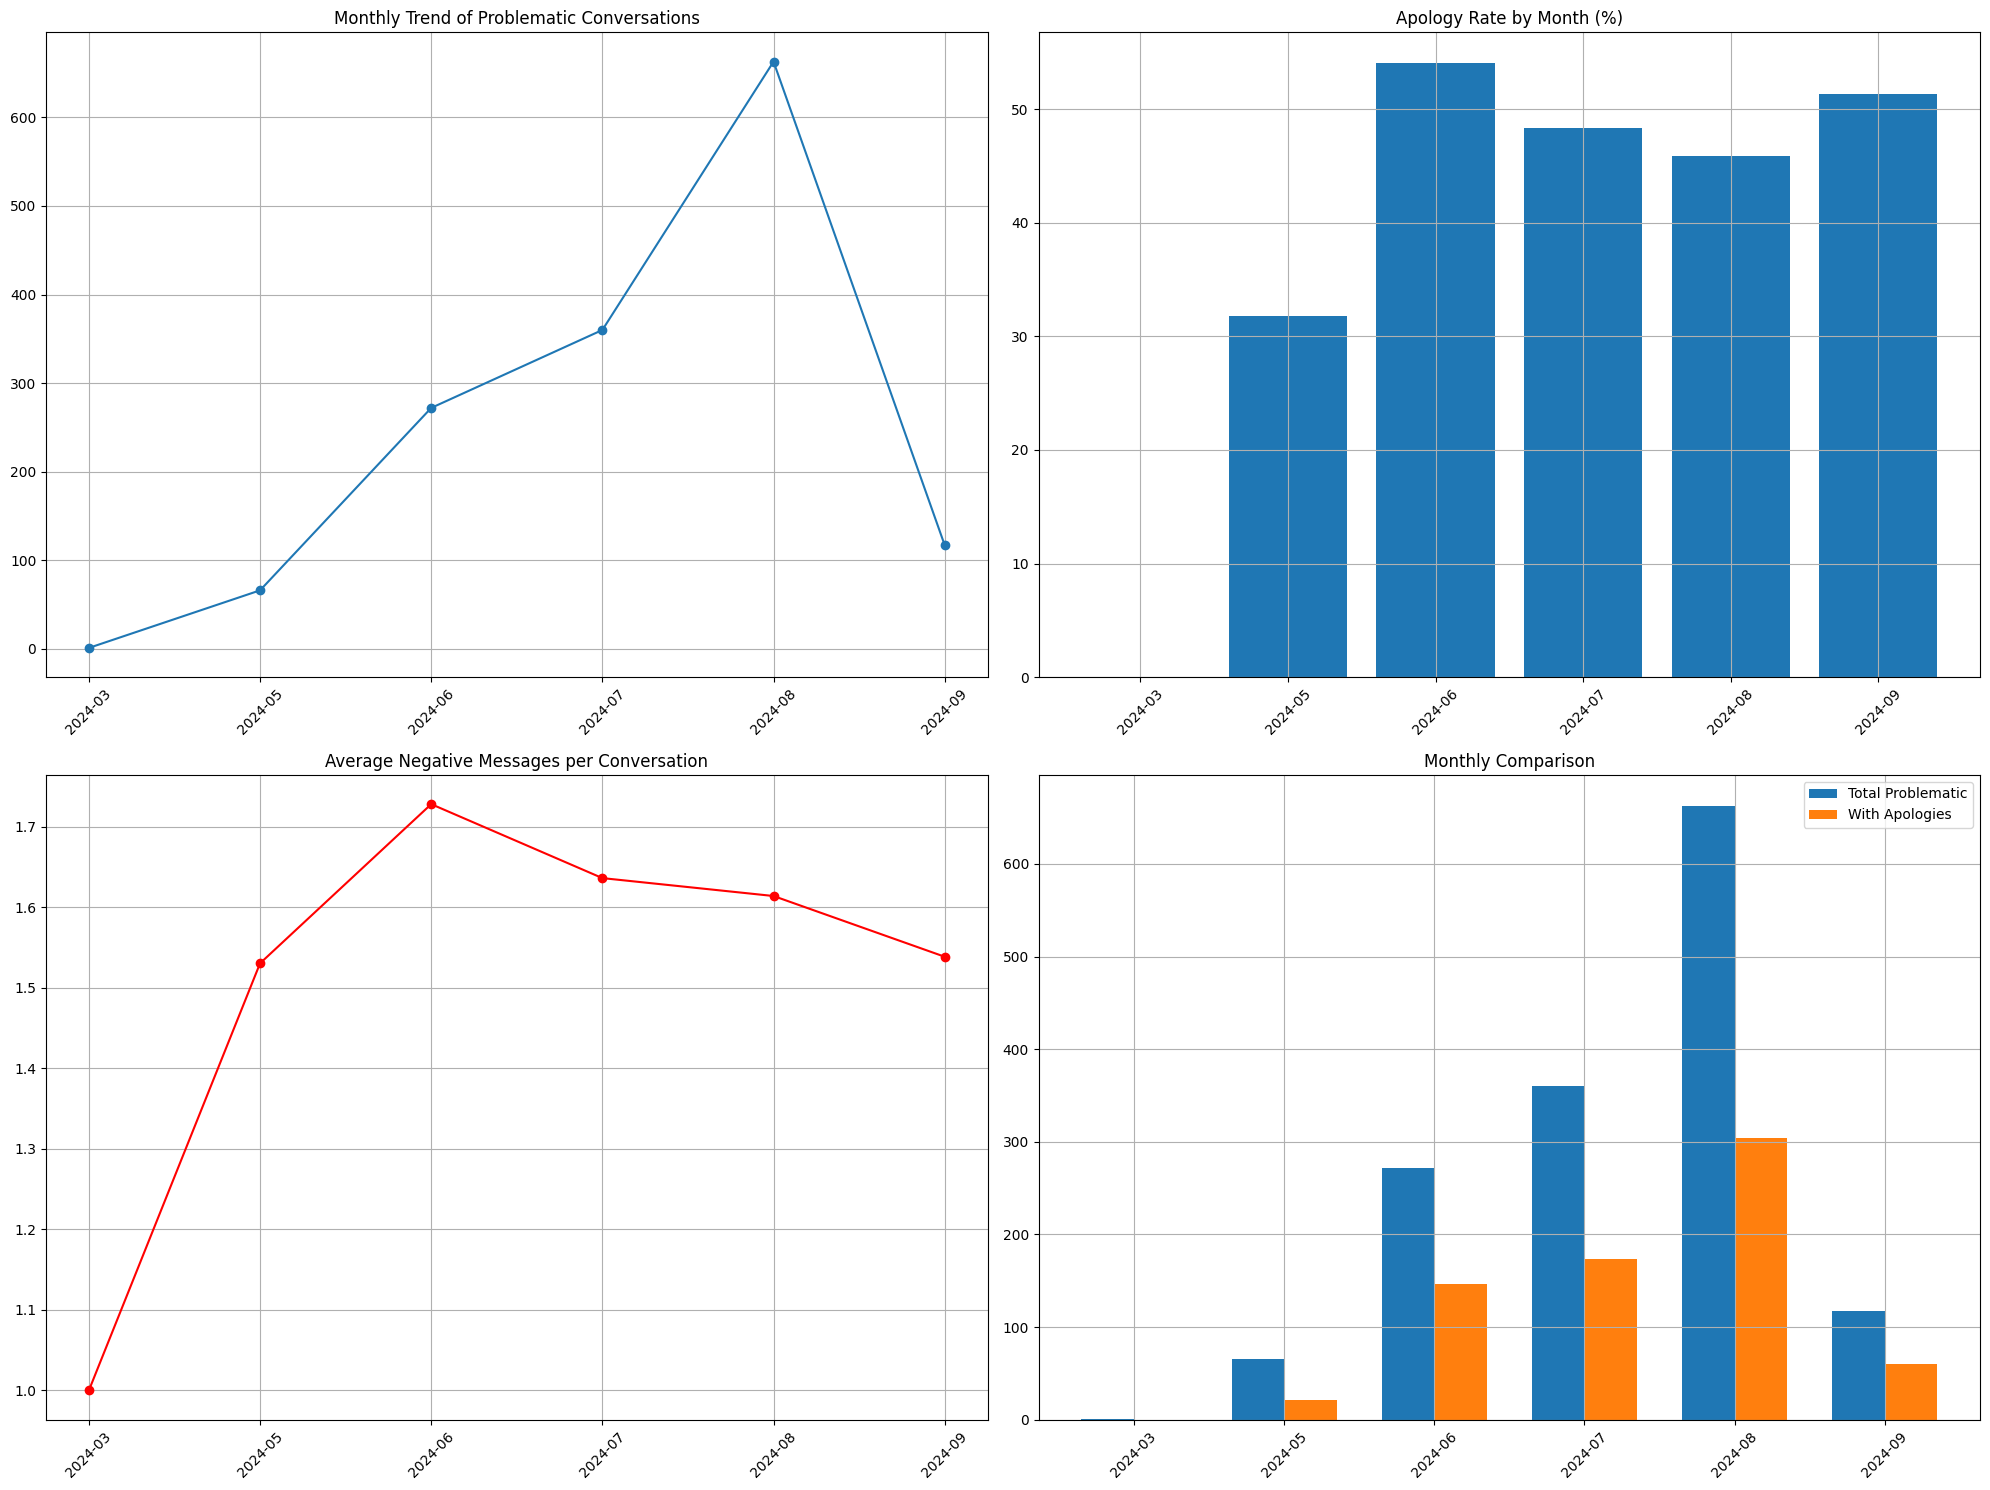

In [5]:
plt.style.use('default')
fig = plt.figure(figsize=(20, 15))

# 1. Monthly Trend of Problematic Conversations
plt.subplot(2, 2, 1)
months = sorted(monthly_stats.keys())
totals = [monthly_stats[m]['total'] for m in months]
plt.plot(months, totals, marker='o')
plt.title('Monthly Trend of Problematic Conversations')
plt.xticks(rotation=45)
plt.grid(True)

# 2. Apology Rate by Month
plt.subplot(2, 2, 2)
apology_rates = [monthly_stats[m]['with_apologies']/monthly_stats[m]['total']*100 
                 if monthly_stats[m]['total'] > 0 else 0 
                 for m in months]
plt.bar(months, apology_rates)
plt.title('Apology Rate by Month (%)')
plt.xticks(rotation=45)
plt.grid(True)

# 3. Average Negative Messages per Conversation
plt.subplot(2, 2, 3)
avg_negative = [monthly_stats[m]['avg_negative_count'] for m in months]
plt.plot(months, avg_negative, marker='o', color='red')
plt.title('Average Negative Messages per Conversation')
plt.xticks(rotation=45)
plt.grid(True)

# 4. Combined Monthly Metrics
plt.subplot(2, 2, 4)
x = np.arange(len(months))
width = 0.35
plt.bar(x - width/2, totals, width, label='Total Problematic')
plt.bar(x + width/2, [monthly_stats[m]['with_apologies'] for m in months], width, label='With Apologies')
plt.title('Monthly Comparison')
plt.xticks(x, months, rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Domain and Task Analysis


Analyzing conversation domains...


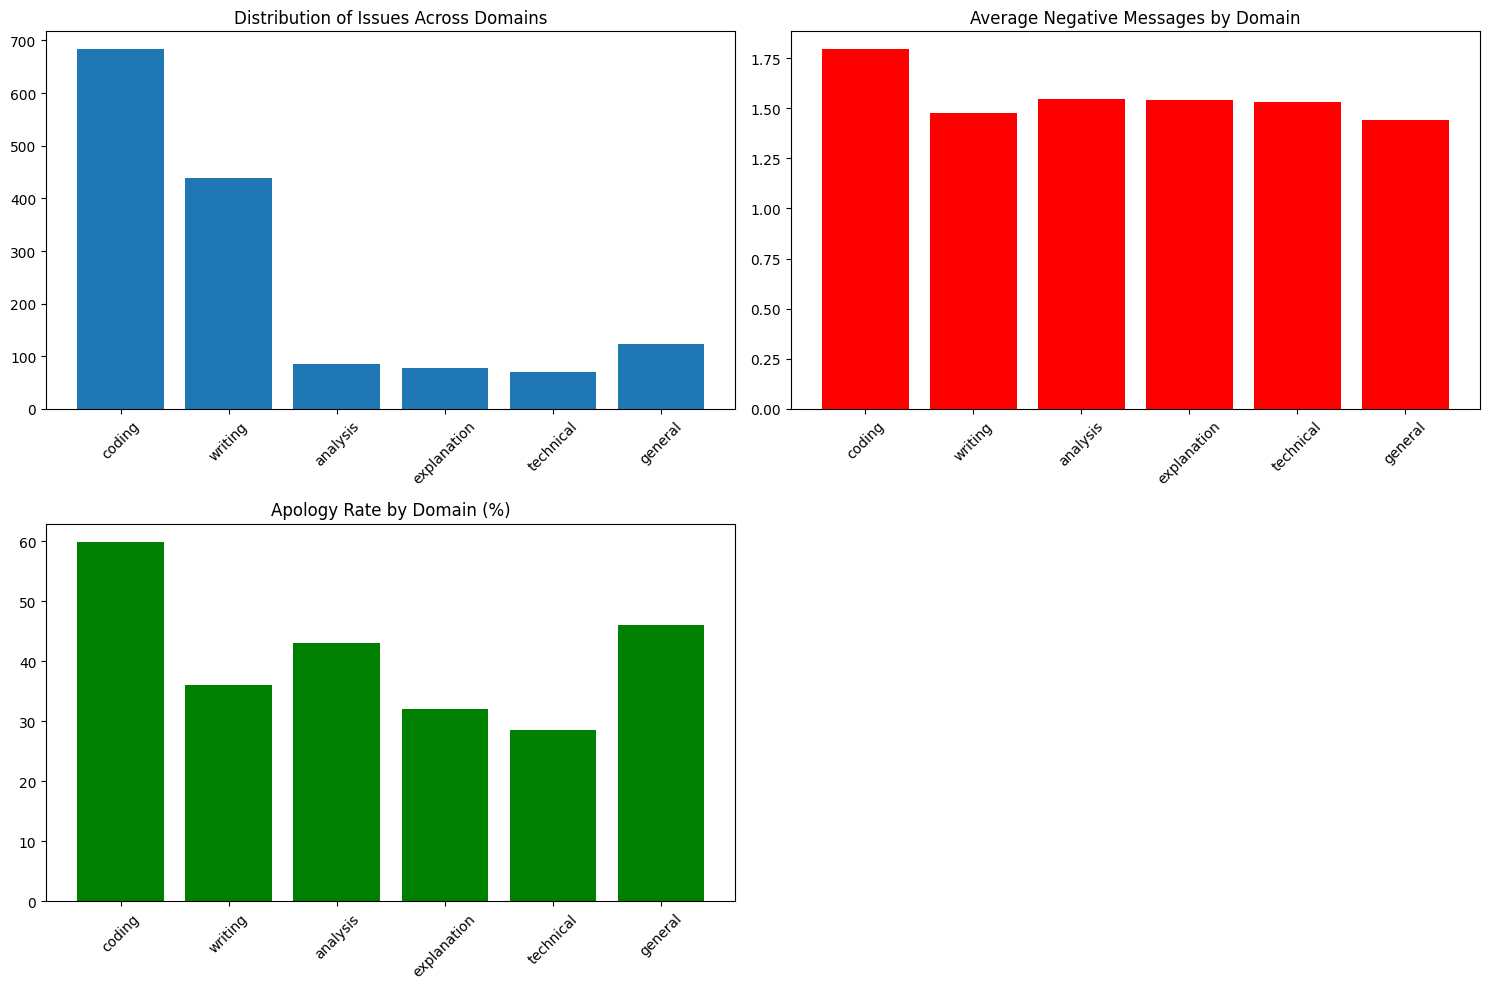


Detailed Domain Analysis:

CODING:
Total conversations: 683
Average negative messages: 1.79
Apology rate: 59.9%

WRITING:
Total conversations: 438
Average negative messages: 1.48
Apology rate: 36.1%

ANALYSIS:
Total conversations: 86
Average negative messages: 1.55
Apology rate: 43.0%

EXPLANATION:
Total conversations: 78
Average negative messages: 1.54
Apology rate: 32.1%

TECHNICAL:
Total conversations: 70
Average negative messages: 1.53
Apology rate: 28.6%

GENERAL:
Total conversations: 124
Average negative messages: 1.44
Apology rate: 46.0%


In [6]:
def analyze_conversation_domains(conversations):
    """Analyze the types of tasks/domains where issues occur most frequently."""
    domains = {
        'coding': ['code', 'programming', 'function', 'error', 'script', 'debug'],
        'writing': ['write', 'essay', 'text', 'document', 'edit', 'revise'],
        'analysis': ['analyze', 'data', 'calculate', 'report', 'statistics'],
        'explanation': ['explain', 'describe', 'define', 'clarify', 'understand'],
        'technical': ['system', 'configure', 'setup', 'install', 'technical'],
        'general': ['help', 'question', 'how to', 'what is']
    }
    
    domain_stats = {domain: {'count': 0, 'avg_negative': 0, 'apology_rate': 0} 
                   for domain in domains}
    
    for conv in conversations:
        full_text = ' '.join(conv['messages']).lower()
        domain_scores = {domain: sum(1 for keyword in keywords if keyword in full_text)
                         for domain, keywords in domains.items()}
        dominant_domain = max(domain_scores.items(), key=lambda x: x[1])[0]
        domain_stats[dominant_domain]['count'] += 1
        domain_stats[dominant_domain]['avg_negative'] += conv['negative_count']
        domain_stats[dominant_domain]['apology_rate'] += 1 if conv['contains_apology'] else 0
    
    for stats in domain_stats.values():
        if stats['count'] > 0:
            stats['avg_negative'] /= stats['count']
            stats['apology_rate'] = (stats['apology_rate'] / stats['count']) * 100
    
    return domain_stats

print("\nAnalyzing conversation domains...")
domain_analysis = analyze_conversation_domains(conversations)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
domains_list = list(domain_analysis.keys())
counts = [stats['count'] for stats in domain_analysis.values()]
plt.bar(domains_list, counts)
plt.title('Distribution of Issues Across Domains')
plt.xticks(rotation=45)
plt.subplot(2, 2, 2)
avg_negative = [stats['avg_negative'] for stats in domain_analysis.values()]
plt.bar(domains_list, avg_negative, color='red')
plt.title('Average Negative Messages by Domain')
plt.xticks(rotation=45)
plt.subplot(2, 2, 3)
apology_rates = [stats['apology_rate'] for stats in domain_analysis.values()]
plt.bar(domains_list, apology_rates, color='green')
plt.title('Apology Rate by Domain (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nDetailed Domain Analysis:")
for domain, stats in domain_analysis.items():
    print(f"\n{domain.upper()}:")
    print(f"Total conversations: {stats['count']}")
    print(f"Average negative messages: {stats['avg_negative']:.2f}")
    print(f"Apology rate: {stats['apology_rate']:.1f}%")

# Response Pattern Analysis

/tmp/ipykernel_179275/3319606200.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([apology_changes, no_apology_changes], labels=['With Apology', 'Without Apology'])


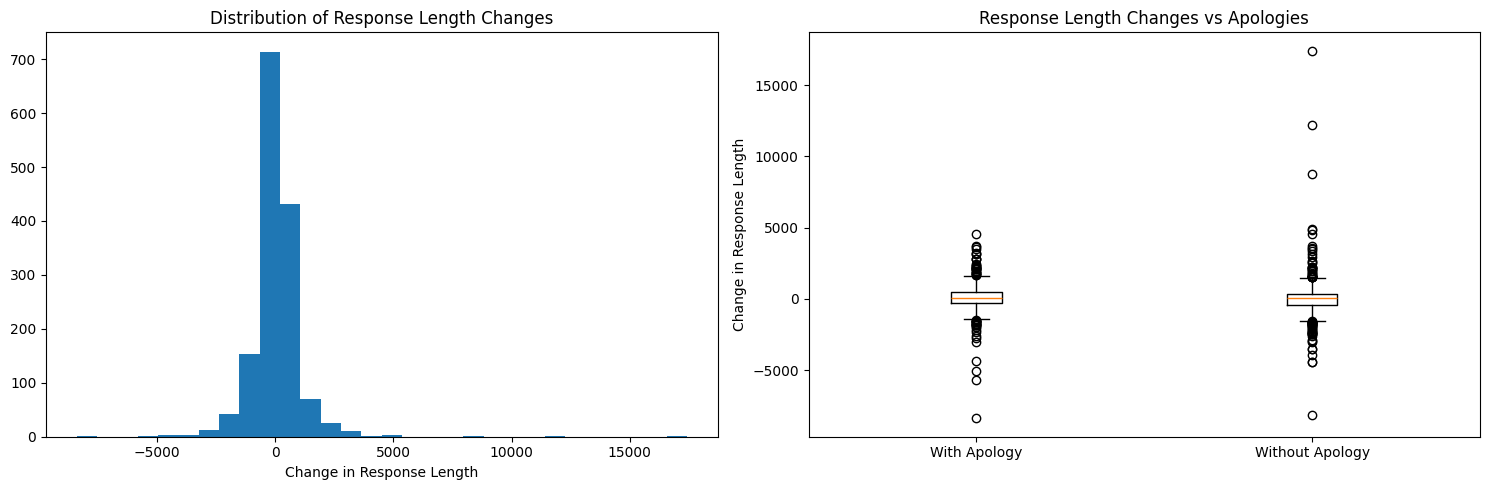

In [7]:
def analyze_response_patterns(conversations):
    """Analyze patterns in system responses to user dissatisfaction."""
    length_patterns = []
    for conv in conversations:
        response_lengths = [len(str(resp)) for resp in conv['responses']]
        length_patterns.append({
            'initial_length': response_lengths[0],
            'final_length': response_lengths[-1],
            'length_change': response_lengths[-1] - response_lengths[0],
            'contains_apology': conv['contains_apology']
        })
    return length_patterns

patterns = analyze_response_patterns(conversations)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
length_changes = [p['length_change'] for p in patterns]
plt.hist(length_changes, bins=30)
plt.title('Distribution of Response Length Changes')
plt.xlabel('Change in Response Length')
plt.subplot(1, 2, 2)
apology_changes = [p['length_change'] for p in patterns if p['contains_apology']]
no_apology_changes = [p['length_change'] for p in patterns if not p['contains_apology']]
plt.boxplot([apology_changes, no_apology_changes], labels=['With Apology', 'Without Apology'])
plt.title('Response Length Changes vs Apologies')
plt.ylabel('Change in Response Length')
plt.tight_layout()
plt.show()

# Frustration Trigger Analysis


Analyzing frustration triggers...


Analyzing triggers: 100%|██████████| 1479/1479 [00:00<00:00, 1576.34it/s]


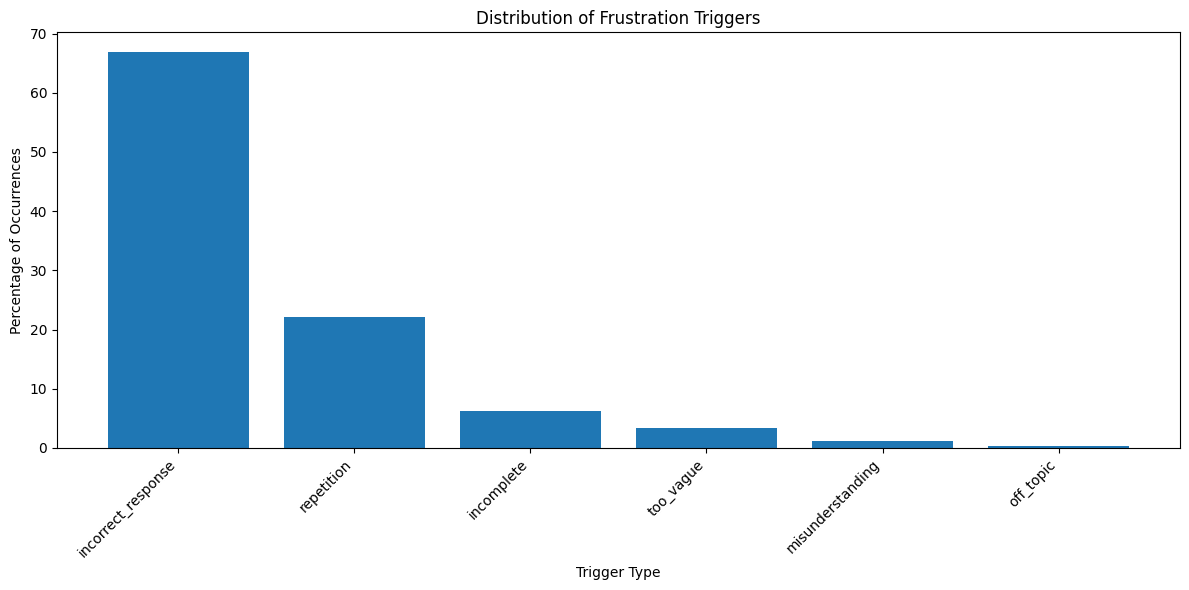


Detailed Trigger Analysis:

INCORRECT_RESPONSE (702 occurrences, 66.9%)
Example context:

Example 1:
User message: Thesis
The purpose of this essay is to display the impact that quantum computing with an AI base technology has on modern-day cyberspace, the current transition into Fifth Generation Warfare (5GW) and...
Previous system response: I'm ready to assess your text based on these rules. Please provide the text, and I'll evaluate it according to each rule, giving a score of 1-10 for each rule and an overall percentage score for the d...
Sentiment score: 0.66

Example 2:
User message: Introduction
As the U.S. Air Force (USAF) moves into an era dominated by Artificial Intelligence (AI), it becomes imperative to reexamine and revise the foundational doctrines to harness the capabilit...
Previous system response: I'll be happy to help evaluate essays based on these rules. Please provide the essays, and I'll score each one according to the rules.

For each essay, I'll provide a score

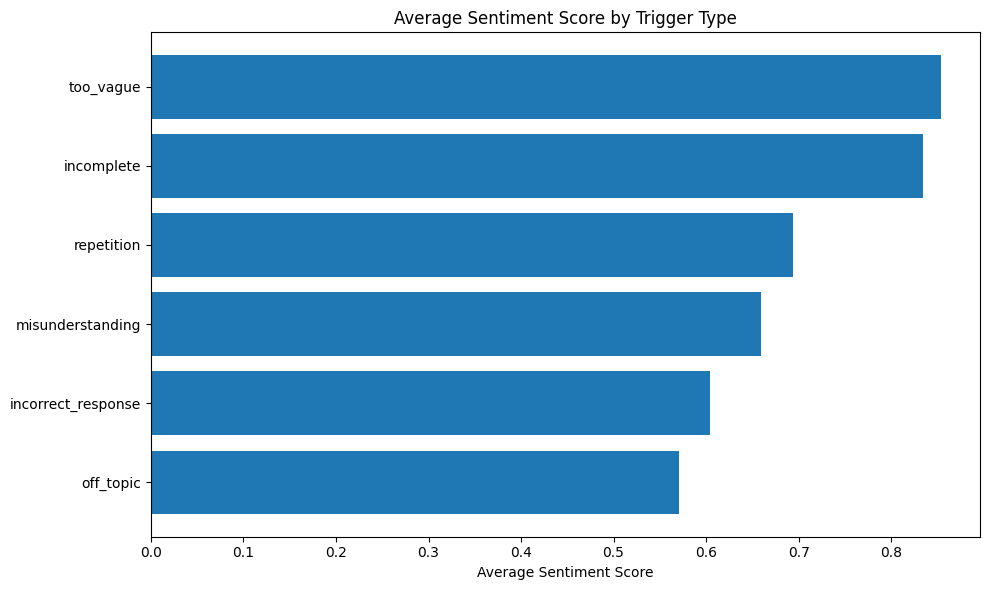


Key Insights:
Most common trigger: incorrect_response
Trigger with most negative sentiment: off_topic


In [10]:
from tqdm import tqdm
import re


def analyze_frustration_triggers(conversations):
    """Analyze common triggers that lead to user frustration."""
    print("\nAnalyzing frustration triggers...")
    trigger_patterns = {
        'incorrect_response': r'(?i)(wrong|incorrect|not right|not what I|error|mistake)',
        'repetition': r'(?i)(repeat|again|already said|told you|same thing)',
        'misunderstanding': r'(?i)(not understanding|didnt understand|misunderstand|confused)',
        'incomplete': r'(?i)(incomplete|not finished|partial|missing|left out)',
        'too_vague': r'(?i)(vague|unclear|be specific|more detail|clearer)',
        'off_topic': r'(?i)(off topic|irrelevant|not related|different topic)'
    }
    
    trigger_stats = {trigger: {'count': 0, 'examples': []} for trigger in trigger_patterns}
    
    for conv in tqdm(conversations, desc="Analyzing triggers"):
        for i, msg in enumerate(conv['messages'][1:], 1):  # Start from second message
            for trigger, pattern in trigger_patterns.items():
                if re.search(pattern, str(msg)):
                    trigger_stats[trigger]['count'] += 1
                    if len(trigger_stats[trigger]['examples']) < 3:
                        trigger_stats[trigger]['examples'].append({
                            'user_message': msg,
                            'previous_response': conv['responses'][i-1] if i-1 < len(conv['responses']) else None,
                            'sentiment_score': conv['sentiments'][i]['score']
                        })
    
    total_triggers = sum(stats['count'] for stats in trigger_stats.values())
    trigger_percentages = {
        trigger: (stats['count'] / total_triggers * 100 if total_triggers > 0 else 0)
        for trigger, stats in trigger_stats.items()
    }
    
    plt.figure(figsize=(12, 6))
    triggers = list(trigger_percentages.keys())
    percentages = list(trigger_percentages.values())
    sorted_indices = np.argsort(percentages)[::-1]
    triggers = [triggers[i] for i in sorted_indices]
    percentages = [percentages[i] for i in sorted_indices]
    plt.bar(triggers, percentages)
    plt.title('Distribution of Frustration Triggers')
    plt.xlabel('Trigger Type')
    plt.ylabel('Percentage of Occurrences')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print("\nDetailed Trigger Analysis:")
    for trigger in triggers:
        print(f"\n{trigger.upper()} ({trigger_stats[trigger]['count']} occurrences, {trigger_percentages[trigger]:.1f}%)")
        if trigger_stats[trigger]['examples']:
            print("Example context:")
            for i, example in enumerate(trigger_stats[trigger]['examples'], 1):
                print(f"\nExample {i}:")
                print(f"User message: {example['user_message'][:200]}...")
                if example['previous_response']:
                    print(f"Previous system response: {example['previous_response'][:200]}...")
                print(f"Sentiment score: {example['sentiment_score']:.2f}")
    
    return trigger_stats, trigger_percentages

trigger_stats, trigger_percentages = analyze_frustration_triggers(conversations)

plt.figure(figsize=(10, 6))
trigger_avg_sentiment = {}
for trigger, stats in trigger_stats.items():
    if stats['examples']:
        avg_sentiment = np.mean([ex['sentiment_score'] for ex in stats['examples']])
        trigger_avg_sentiment[trigger] = avg_sentiment

sorted_triggers = sorted(trigger_avg_sentiment.items(), key=lambda x: x[1])
triggers = [t[0] for t in sorted_triggers]
sentiments = [t[1] for t in sorted_triggers]

plt.barh(triggers, sentiments)
plt.title('Average Sentiment Score by Trigger Type')
plt.xlabel('Average Sentiment Score')
plt.tight_layout()
plt.show()

print("\nKey Insights:")
print(f"Most common trigger: {max(trigger_percentages.items(), key=lambda x: x[1])[0]}")
print(f"Trigger with most negative sentiment: {min(trigger_avg_sentiment.items(), key=lambda x: x[1])[0]}")

# Response Pattern Analysis for Negative Emotions


Analyzing system responses that trigger negative emotions...


Analyzing response patterns: 100%|██████████| 1479/1479 [00:00<00:00, 1549.81it/s]


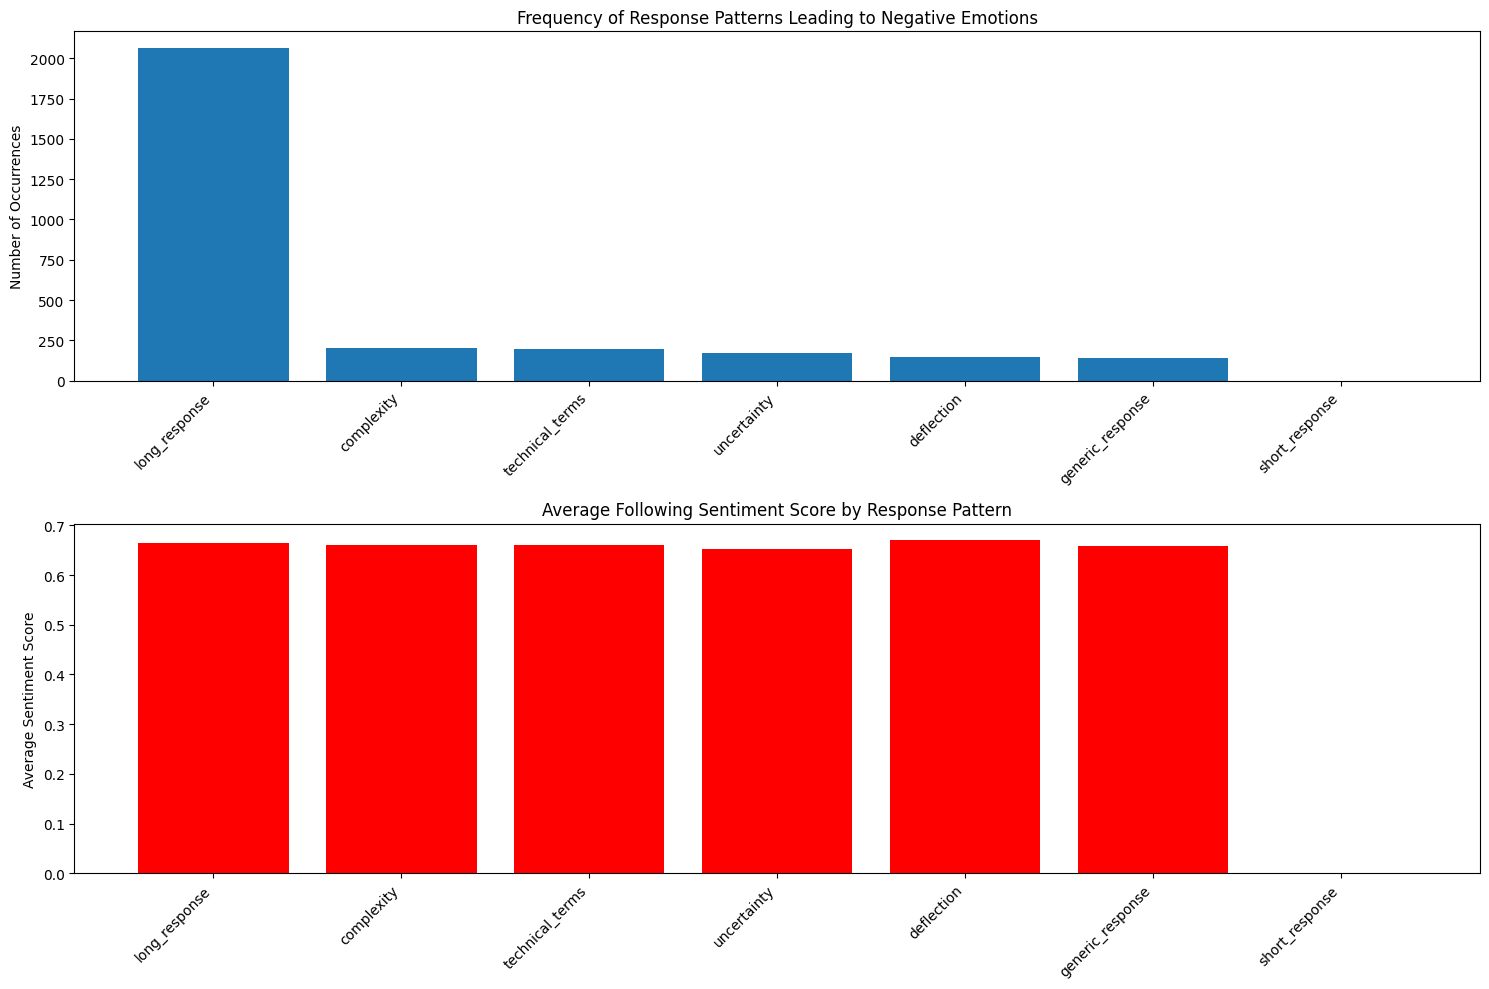


Detailed Response Pattern Analysis:

LONG_RESPONSE (2064 occurrences)
Average next sentiment score: 0.664

COMPLEXITY (200 occurrences)
Average next sentiment score: 0.661

TECHNICAL_TERMS (199 occurrences)
Average next sentiment score: 0.662

UNCERTAINTY (169 occurrences)
Average next sentiment score: 0.652

DEFLECTION (150 occurrences)
Average next sentiment score: 0.670

GENERIC_RESPONSE (143 occurrences)
Average next sentiment score: 0.658

SHORT_RESPONSE (0 occurrences)
Average next sentiment score: 0.000

Analyzing response length correlation with negative emotions...


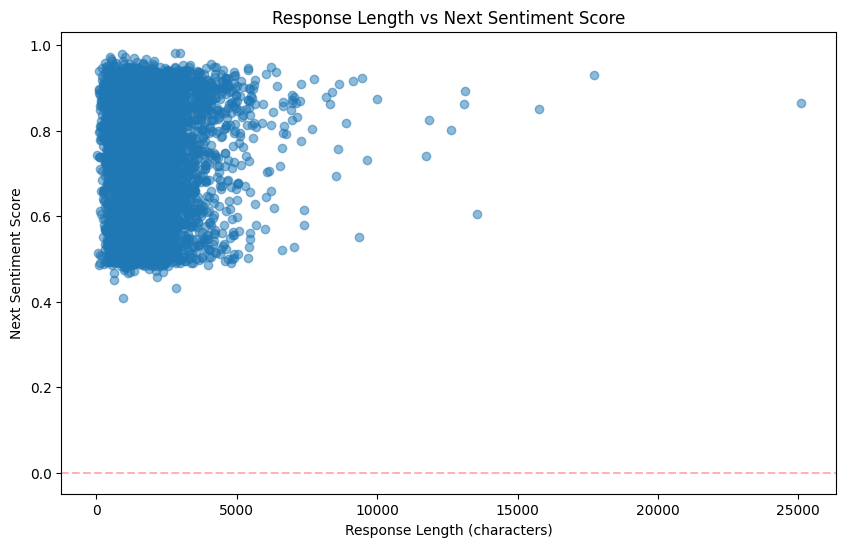


Correlation between response length and next sentiment: 0.047

Key Insights:
Most common trigger: incorrect_response
Trigger with most negative sentiment: off_topic


In [11]:
def analyze_negative_response_patterns(conversations):
    """Analyze system responses that trigger increased negative emotions."""
    print("\nAnalyzing system responses that trigger negative emotions...")
    response_patterns = {
        'generic_response': r'(?i)(I understand|I can help|please provide|I\'ll assist)',
        'uncertainty': r'(?i)(might|maybe|perhaps|not sure|possibly)',
        'deflection': r'(?i)(cannot|unable to|I don\'t|I can\'t)',
        'complexity': r'(?i)(complex|complicated|difficult|advanced)',
        'technical_terms': r'(?i)(technical|functionality|implementation|algorithm)',
        'long_response': lambda x: len(str(x)) > 500,
        'short_response': lambda x: len(str(x)) < 50
    }
    
    pattern_stats = {pattern: {'count': 0, 'avg_next_sentiment': 0.0, 'examples': []} 
                     for pattern in response_patterns}
    
    for conv in tqdm(conversations, desc="Analyzing response patterns"):
        for i in range(len(conv['responses'])-1):
            current_response = conv['responses'][i]
            if i+1 < len(conv['sentiments']):
                next_sentiment = conv['sentiments'][i+1]
                if next_sentiment['label'].lower() == 'negative':
                    for pattern_name, pattern in response_patterns.items():
                        matches = False
                        if callable(pattern):
                            matches = pattern(current_response)
                        else:
                            matches = bool(re.search(pattern, str(current_response)))
                        if matches:
                            pattern_stats[pattern_name]['count'] += 1
                            pattern_stats[pattern_name]['avg_next_sentiment'] += next_sentiment['score']
                            if (next_sentiment['score'] < -0.5 and 
                                len(pattern_stats[pattern_name]['examples']) < 3):
                                pattern_stats[pattern_name]['examples'].append({
                                    'response': current_response,
                                    'next_user_message': conv['messages'][i+1] if i+1 < len(conv['messages']) else None,
                                    'sentiment_score': next_sentiment['score']
                                })
    
    for stats in pattern_stats.values():
        if stats['count'] > 0:
            stats['avg_next_sentiment'] /= stats['count']
    
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 1, 1)
    patterns_list = list(pattern_stats.keys())
    counts = [stats['count'] for stats in pattern_stats.values()]
    sorted_indices = np.argsort(counts)[::-1]
    patterns_list = [patterns_list[i] for i in sorted_indices]
    counts = [counts[i] for i in sorted_indices]
    plt.bar(patterns_list, counts)
    plt.title('Frequency of Response Patterns Leading to Negative Emotions')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Occurrences')
    plt.subplot(2, 1, 2)
    avg_sentiments = [pattern_stats[p]['avg_next_sentiment'] for p in patterns_list]
    plt.bar(patterns_list, avg_sentiments, color='red')
    plt.title('Average Following Sentiment Score by Response Pattern')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Average Sentiment Score')
    plt.tight_layout()
    plt.show()
    
    print("\nDetailed Response Pattern Analysis:")
    for pattern in patterns_list:
        stats = pattern_stats[pattern]
        print(f"\n{pattern.upper()} ({stats['count']} occurrences)")
        print(f"Average next sentiment score: {stats['avg_next_sentiment']:.3f}")
        if stats['examples']:
            print("\nExample responses that triggered strong negative reactions:")
            for i, example in enumerate(stats['examples'], 1):
                print(f"\nExample {i}:")
                print(f"System response: {str(example['response'])[:200]}...")
                if example['next_user_message']:
                    print(f"User reaction: {str(example['next_user_message'])[:200]}...")
                print(f"Resulting sentiment score: {example['sentiment_score']:.3f}")
    
    return pattern_stats

response_pattern_stats = analyze_negative_response_patterns(conversations)

print("\nAnalyzing response length correlation with negative emotions...")
lengths = []
sentiments_list = []
for conv in conversations:
    for i in range(len(conv['responses'])-1):
        if i+1 < len(conv['sentiments']):
            lengths.append(len(str(conv['responses'][i])))
            sentiments_list.append(conv['sentiments'][i+1]['score'])
            
plt.figure(figsize=(10, 6))
plt.scatter(lengths, sentiments_list, alpha=0.5)
plt.title('Response Length vs Next Sentiment Score')
plt.xlabel('Response Length (characters)')
plt.ylabel('Next Sentiment Score')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.show()

correlation = np.corrcoef(lengths, sentiments_list)[0,1]
print(f"\nCorrelation between response length and next sentiment: {correlation:.3f}")

print("\nKey Insights:")
print(f"Most common trigger: {max(trigger_percentages.items(), key=lambda x: x[1])[0]}")
# (For trigger with most negative sentiment, ensure you have trigger_avg_sentiment computed as in the previous section.)
if trigger_avg_sentiment:
    print(f"Trigger with most negative sentiment: {min(trigger_avg_sentiment.items(), key=lambda x: x[1])[0]}")

# Message Length and Response Time Analysis:


Analyzing message patterns and complexity...

Message Pattern Analysis:
Average user message length: 653.3 characters
Average system response length: 1832.8 characters


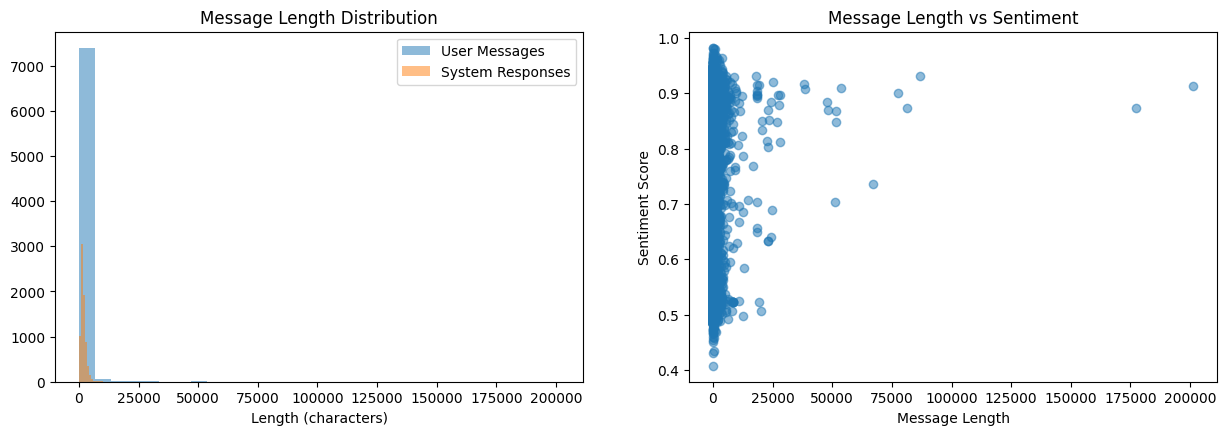

In [12]:
def analyze_message_patterns(conversations):
    """Analyze how message length and complexity relate to frustration."""
    print("\nAnalyzing message patterns and complexity...")
    
    patterns = {
        'user_message_length': [],
        'system_response_length': [],
        'sentiment_scores': [],
        'negative_messages': []
    }
    
    for conv in conversations:
        for msg, resp, sent in zip(conv['messages'], conv['responses'], conv['sentiments']):
            if all(x is not None for x in [msg, resp, sent]):
                patterns['user_message_length'].append(len(str(msg)))
                patterns['system_response_length'].append(len(str(resp)))
                patterns['sentiment_scores'].append(sent['score'])
                patterns['negative_messages'].append(1 if sent['label'].lower() == 'negative' else 0)
    
    # Visualize relationships
    plt.figure(figsize=(15, 10))
    
    # Message Length Distribution
    plt.subplot(2, 2, 1)
    plt.hist(patterns['user_message_length'], bins=30, alpha=0.5, label='User Messages')
    plt.hist(patterns['system_response_length'], bins=30, alpha=0.5, label='System Responses')
    plt.title('Message Length Distribution')
    plt.xlabel('Length (characters)')
    plt.legend()
    
    # Length vs Sentiment
    plt.subplot(2, 2, 2)
    plt.scatter(patterns['user_message_length'], patterns['sentiment_scores'], alpha=0.5)
    plt.title('Message Length vs Sentiment')
    plt.xlabel('Message Length')
    plt.ylabel('Sentiment Score')
    
    # Calculate and display statistics
    print("\nMessage Pattern Analysis:")
    print(f"Average user message length: {np.mean(patterns['user_message_length']):.1f} characters")
    print(f"Average system response length: {np.mean(patterns['system_response_length']):.1f} characters")
    
    return patterns

# Run the analysis
message_patterns = analyze_message_patterns(conversations)

###

findings:
-Longer exchanges don't necessarily lead to worse sentiment
-Most messages cluster in shorter lengths, with some extreme outliers
-Messages between 0-25000 characters show the most sentiment variation

###

# Response effectiveness by message length 


Analyzing response effectiveness by length...


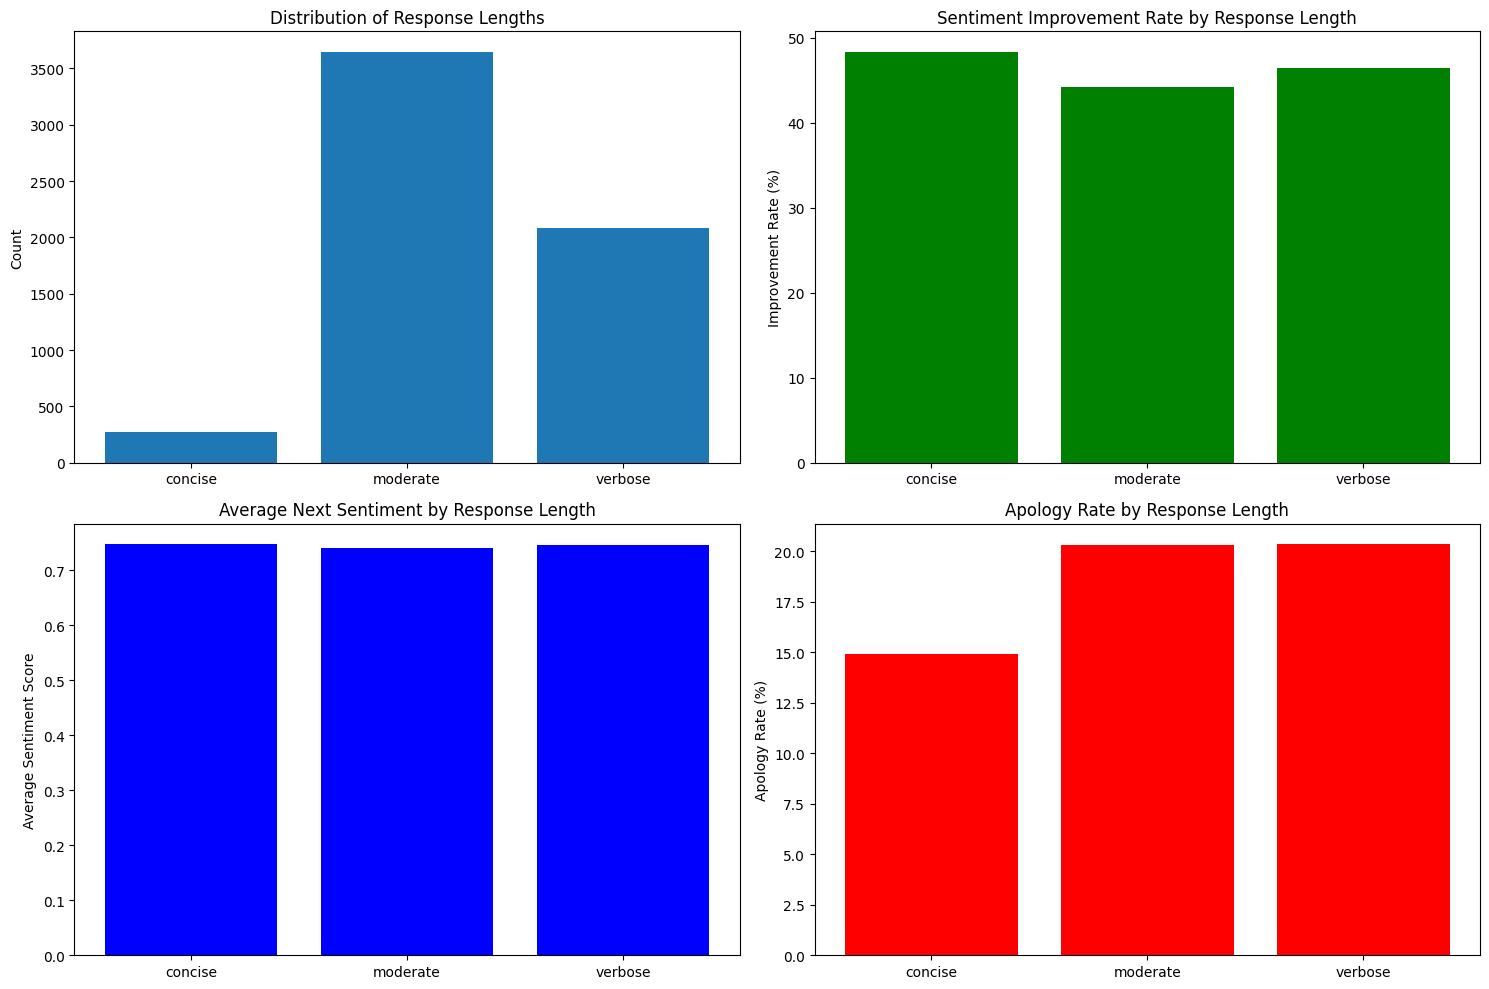


Detailed Response Length Analysis:

CONCISE RESPONSES:
Count: 275
Improvement Rate: 48.4%
Average Next Sentiment: 0.747
Apology Rate: 14.9%

MODERATE RESPONSES:
Count: 3646
Improvement Rate: 44.2%
Average Next Sentiment: 0.740
Apology Rate: 20.3%

VERBOSE RESPONSES:
Count: 2080
Improvement Rate: 46.4%
Average Next Sentiment: 0.746
Apology Rate: 20.3%


In [14]:
from collections import defaultdict

def analyze_response_effectiveness_by_length(conversations):
    """Analyze how response length affects conversation outcomes."""
    print("\nAnalyzing response effectiveness by length...")
    
    # Define length categories (in characters)
    length_categories = {
        'concise': (0, 500),
        'moderate': (501, 2000),
        'verbose': (2001, float('inf'))
    }
    
    # Initialize stats
    length_stats = {cat: {
        'count': 0,
        'avg_sentiment': 0,
        'improvement_rate': 0,
        'apology_rate': 0,
        'domain_distribution': defaultdict(int)
    } for cat in length_categories}
    
    for conv in conversations:
        for i, response in enumerate(conv['responses'][:-1]):  # Exclude last response
            response_length = len(str(response))
            
            # Determine length category
            for cat, (min_len, max_len) in length_categories.items():
                if min_len <= response_length <= max_len:
                    length_stats[cat]['count'] += 1
                    
                    # Track sentiment change
                    if i + 1 < len(conv['sentiments']):
                        current_sentiment = conv['sentiments'][i]['score']
                        next_sentiment = conv['sentiments'][i + 1]['score']
                        length_stats[cat]['avg_sentiment'] += next_sentiment
                        length_stats[cat]['improvement_rate'] += 1 if next_sentiment > current_sentiment else 0
                    
                    # Track if response contains apology
                    if any(pattern in str(response).lower() for pattern in 
                          ['sorry', 'apologize', 'apologies', 'my mistake']):
                        length_stats[cat]['apology_rate'] += 1
                    break
    
    # Calculate averages
    for cat in length_stats:
        if length_stats[cat]['count'] > 0:
            length_stats[cat]['avg_sentiment'] /= length_stats[cat]['count']
            length_stats[cat]['improvement_rate'] = (length_stats[cat]['improvement_rate'] / 
                                                   length_stats[cat]['count'] * 100)
            length_stats[cat]['apology_rate'] = (length_stats[cat]['apology_rate'] / 
                                                length_stats[cat]['count'] * 100)
    
    # Visualize results
    plt.figure(figsize=(15, 10))
    
    # Response Effectiveness Metrics
    categories = list(length_stats.keys())
    
    plt.subplot(2, 2, 1)
    counts = [stats['count'] for stats in length_stats.values()]
    plt.bar(categories, counts)
    plt.title('Distribution of Response Lengths')
    plt.ylabel('Count')
    
    plt.subplot(2, 2, 2)
    improvement_rates = [stats['improvement_rate'] for stats in length_stats.values()]
    plt.bar(categories, improvement_rates, color='green')
    plt.title('Sentiment Improvement Rate by Response Length')
    plt.ylabel('Improvement Rate (%)')
    
    plt.subplot(2, 2, 3)
    avg_sentiments = [stats['avg_sentiment'] for stats in length_stats.values()]
    plt.bar(categories, avg_sentiments, color='blue')
    plt.title('Average Next Sentiment by Response Length')
    plt.ylabel('Average Sentiment Score')
    
    plt.subplot(2, 2, 4)
    apology_rates = [stats['apology_rate'] for stats in length_stats.values()]
    plt.bar(categories, apology_rates, color='red')
    plt.title('Apology Rate by Response Length')
    plt.ylabel('Apology Rate (%)')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print("\nDetailed Response Length Analysis:")
    for cat in categories:
        stats = length_stats[cat]
        print(f"\n{cat.upper()} RESPONSES:")
        print(f"Count: {stats['count']}")
        print(f"Improvement Rate: {stats['improvement_rate']:.1f}%")
        print(f"Average Next Sentiment: {stats['avg_sentiment']:.3f}")
        print(f"Apology Rate: {stats['apology_rate']:.1f}%")
    
    return length_stats

# Run the analysis
response_effectiveness = analyze_response_effectiveness_by_length(conversations)

### Key Findings ###

### Response Distribution ###
Most responses are of moderate length (3,646)  
Verbose responses are common (2,080)  
Concise responses are rare (275)  

### Effectiveness ###
Concise responses have a slightly better improvement rate (48.4%)  
compared to moderate (44.2%) or verbose (46.4%)  
All response lengths maintain similar sentiment scores (~0.74-0.75)  
Shorter responses require fewer apologies (14.9% vs 20.3%)  

### End of Findings ###


# Escalation Patterns

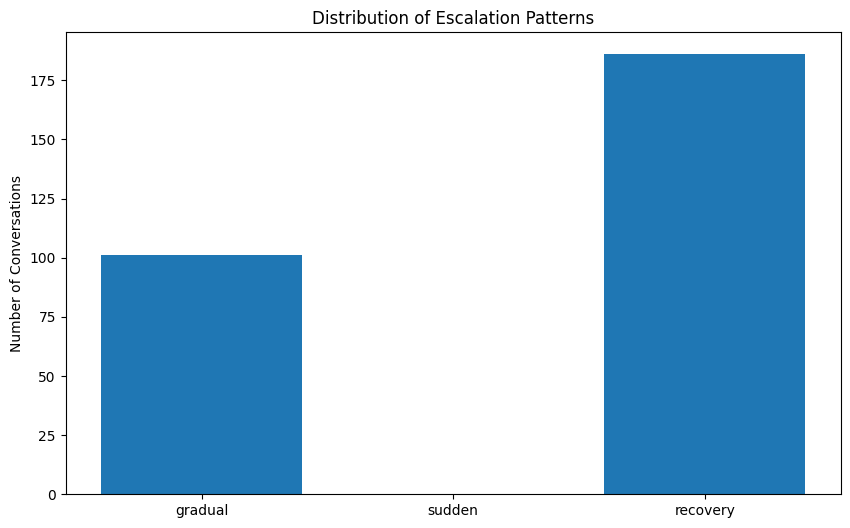

In [15]:
def analyze_escalation_patterns(conversations):
    """Analyze how conversations escalate to negative sentiment."""
    
    escalation_patterns = {
        'gradual': 0,  # Progressive decline in sentiment
        'sudden': 0,   # Sharp decline in sentiment
        'recovery': 0  # Negative followed by improvement
    }
    
    for conv in conversations:
        sentiment_scores = [sent['score'] for sent in conv['sentiments']]
        if len(sentiment_scores) < 3:
            continue
            
        # Calculate sentiment changes
        changes = np.diff(sentiment_scores)
        
        # Identify patterns
        if any(change < -0.5 for change in changes):
            escalation_patterns['sudden'] += 1
        elif all(change < 0 for change in changes):
            escalation_patterns['gradual'] += 1
        elif any(change > 0.3 for change in changes[1:]):
            escalation_patterns['recovery'] += 1
    
    # Visualize escalation patterns
    plt.figure(figsize=(10, 6))
    plt.bar(escalation_patterns.keys(), [v for v in escalation_patterns.values()])
    plt.title('Distribution of Escalation Patterns')
    plt.ylabel('Number of Conversations')
    plt.show()
    
    return escalation_patterns

# Run the analysis
escalation_patterns = analyze_escalation_patterns(conversations)

Gradual Escalation (≈100 conversations):


User frustration builds up slowly over multiple messages
Example:
Message 1: Neutral
Message 2: Slightly annoyed
Message 3: More frustrated
Message 4: Very frustrated


Recovery (≈180 conversations):


Conversations where the user gets frustrated but then becomes satisfied again
Example:
Message 1: Neutral
Message 2: Frustrated
Message 3: Frustrated
Message 4: Back to neutral/positive after AI fixes the issue

Sudden Escalation (minimal cases):


User becomes very frustrated suddenly, without gradual buildup
Example:
Message 1: Neutral
Message 2: Very frustrated immediately

# Recovery Analysis 

Analyzes how conversations recover from negative situations by looking at two main things:

1. How many messages it takes to get back to a positive interaction
2. What techniques the AI uses to turn things around (like showing empathy or offering solutions)


Analyzing recovery patterns...


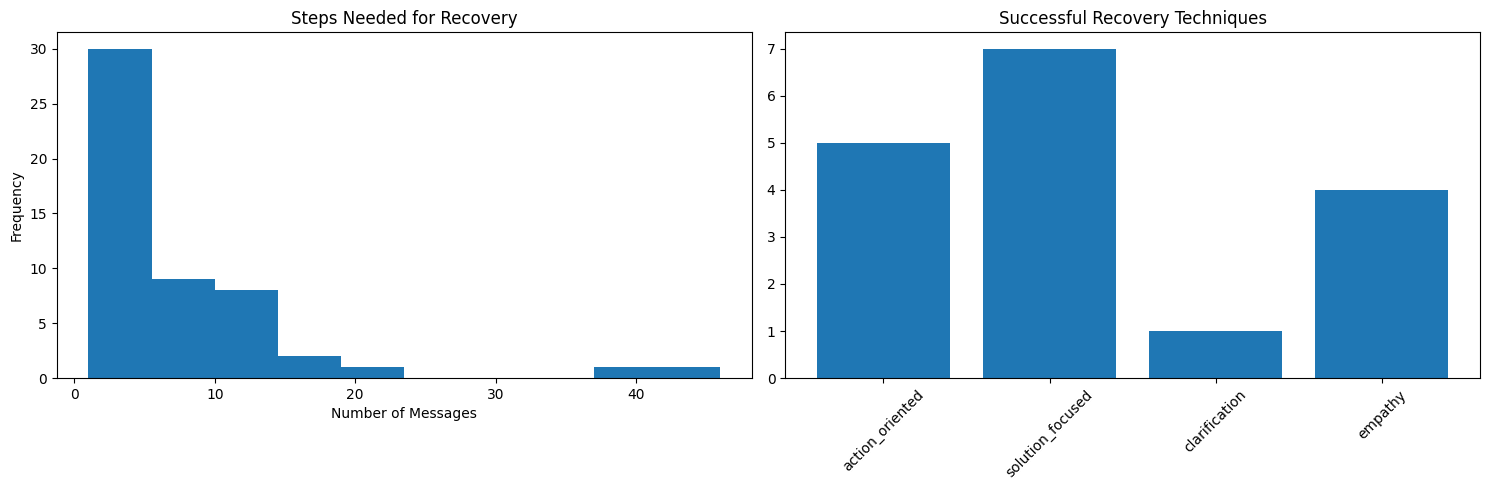


Recovery Analysis:
Total recovery patterns found: 52
Average steps to recover: 7.1

Most effective recovery techniques:
solution_focused: 7 successful recoveries
action_oriented: 5 successful recoveries
empathy: 4 successful recoveries
clarification: 1 successful recoveries


In [19]:
# Imports
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

def analyze_recovery_patterns(conversations):
    """Analyze how conversations recover from negative sentiment."""
    print("\nAnalyzing recovery patterns...")
    
    recovery_stats = {
        'steps_to_recover': [],  
        'recovery_techniques': defaultdict(int)
    }
    
    recovery_markers = {
        'clarification': r'(?i)(let me clarify|to clarify|I understand you)',
        'action_oriented': r'(?i)(let\'s try|we can|I can help|here\'s how)',
        'empathy': r'(?i)(I understand|I see why|that must be)',
        'solution_focused': r'(?i)(here\'s a solution|this should|this will)'
    }
    
    for conv in conversations:
        # Ensure we have both sentiments and responses
        sentiment_scores = [s['score'] for s in conv['sentiments']]
        responses = conv['responses']
        
        # Skip if we don't have enough data
        if len(sentiment_scores) < 2 or len(responses) < 2:
            continue
            
        # Analyze only up to the minimum length of both arrays
        max_idx = min(len(sentiment_scores), len(responses))
        
        for i in range(1, max_idx):
            try:
                if sentiment_scores[i-1] < 0.5 and sentiment_scores[i] > 0.7:
                    recovery_stats['steps_to_recover'].append(i)
                    
                    if i-1 < len(responses):
                        recovery_response = responses[i-1]
                        for technique, pattern in recovery_markers.items():
                            if re.search(pattern, str(recovery_response)):
                                recovery_stats['recovery_techniques'][technique] += 1
            except IndexError:
                continue
    
    # Plotting
    plt.figure(figsize=(15, 5))
    
    # Plot recovery steps
    plt.subplot(1, 2, 1)
    if recovery_stats['steps_to_recover']:
        plt.hist(recovery_stats['steps_to_recover'], bins=10)
        plt.title('Steps Needed for Recovery')
        plt.xlabel('Number of Messages')
        plt.ylabel('Frequency')
    else:
        plt.text(0.5, 0.5, 'No recovery patterns found', 
                horizontalalignment='center', verticalalignment='center')
    
    # Plot recovery techniques
    plt.subplot(1, 2, 2)
    if recovery_stats['recovery_techniques']:
        techniques = list(recovery_stats['recovery_techniques'].keys())
        counts = list(recovery_stats['recovery_techniques'].values())
        plt.bar(techniques, counts)
        plt.title('Successful Recovery Techniques')
        plt.xticks(rotation=45)
    else:
        plt.text(0.5, 0.5, 'No recovery techniques found', 
                horizontalalignment='center', verticalalignment='center')
    
    plt.tight_layout()
    plt.show()
    
    # Print analysis
    print("\nRecovery Analysis:")
    if recovery_stats['steps_to_recover']:
        print(f"Total recovery patterns found: {len(recovery_stats['steps_to_recover'])}")
        print(f"Average steps to recover: {np.mean(recovery_stats['steps_to_recover']):.1f}")
    else:
        print("No recovery patterns found")
        
    print("\nMost effective recovery techniques:")
    if recovery_stats['recovery_techniques']:
        for technique, count in sorted(recovery_stats['recovery_techniques'].items(), 
                                     key=lambda x: x[1], reverse=True):
            print(f"{technique}: {count} successful recoveries")
    else:
        print("No recovery techniques identified")
    
    return recovery_stats

# Call the function
recovery_analysis = analyze_recovery_patterns(conversations)

Key Findings from Results:
Steps to Recovery:

Found 52 cases where conversations improved from negative to positive
Most recoveries happen quickly (within first few messages)
Average of 7.1 messages needed to recover
Some rare cases took up to 40 messages to recover

Most Effective Techniques:

Solution-focused (7 cases): Direct problem-solving works best
Action-oriented (5 cases): Suggesting specific actions
Empathy (4 cases): Showing understanding
Clarification (1 case): Least used but still effective


Analyzing Conversation Complexity...


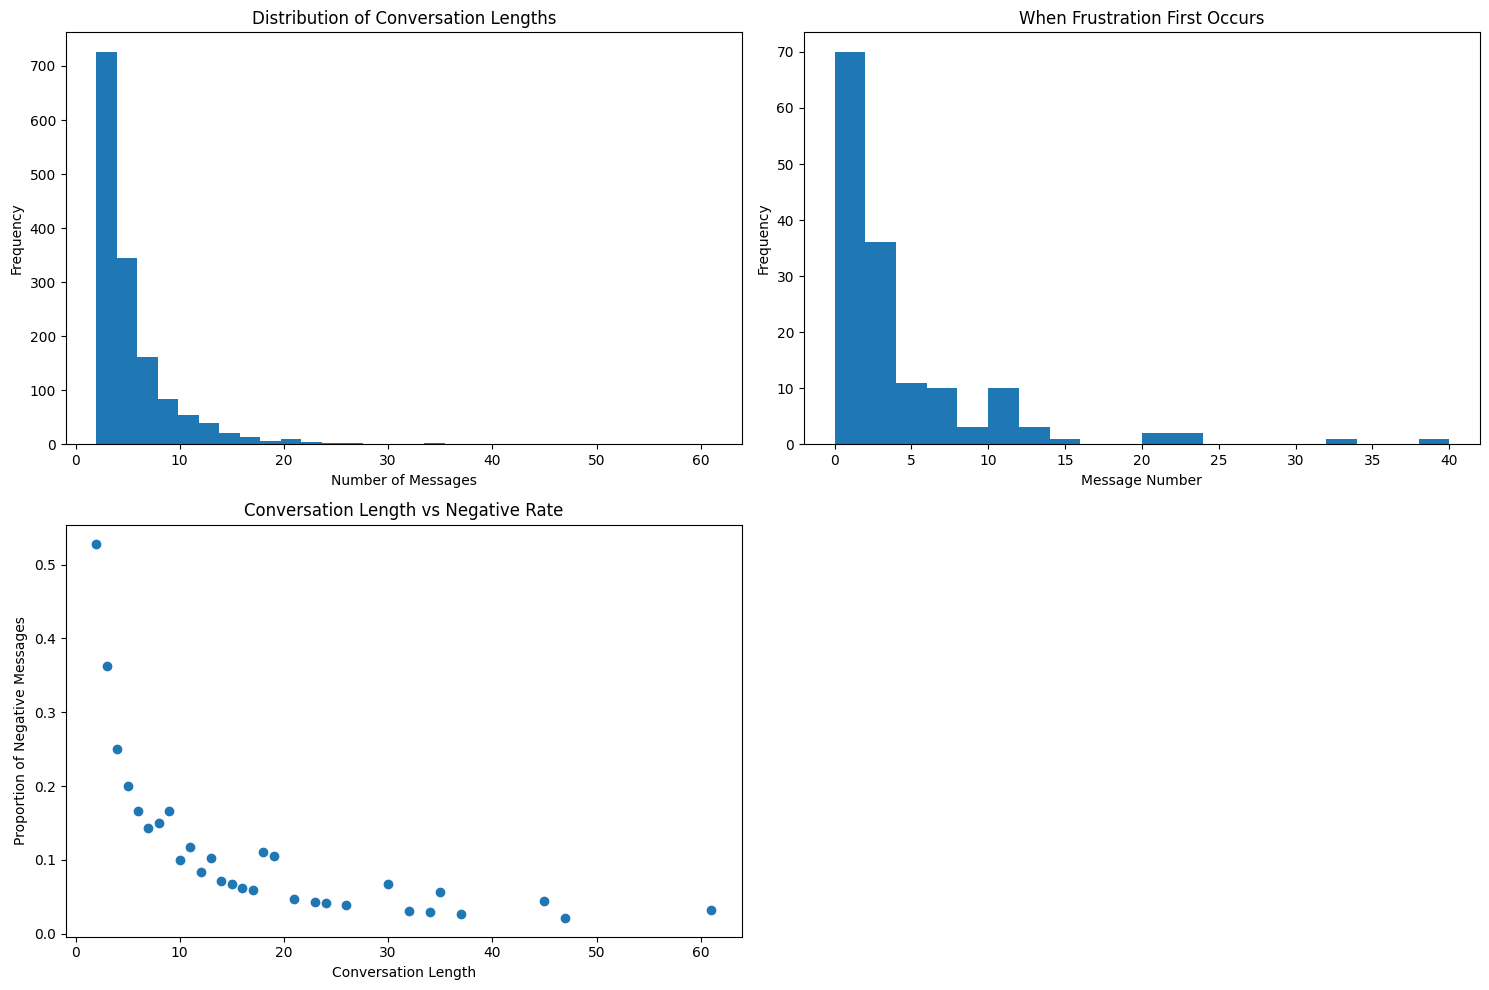


Analyzing Temporal Patterns...


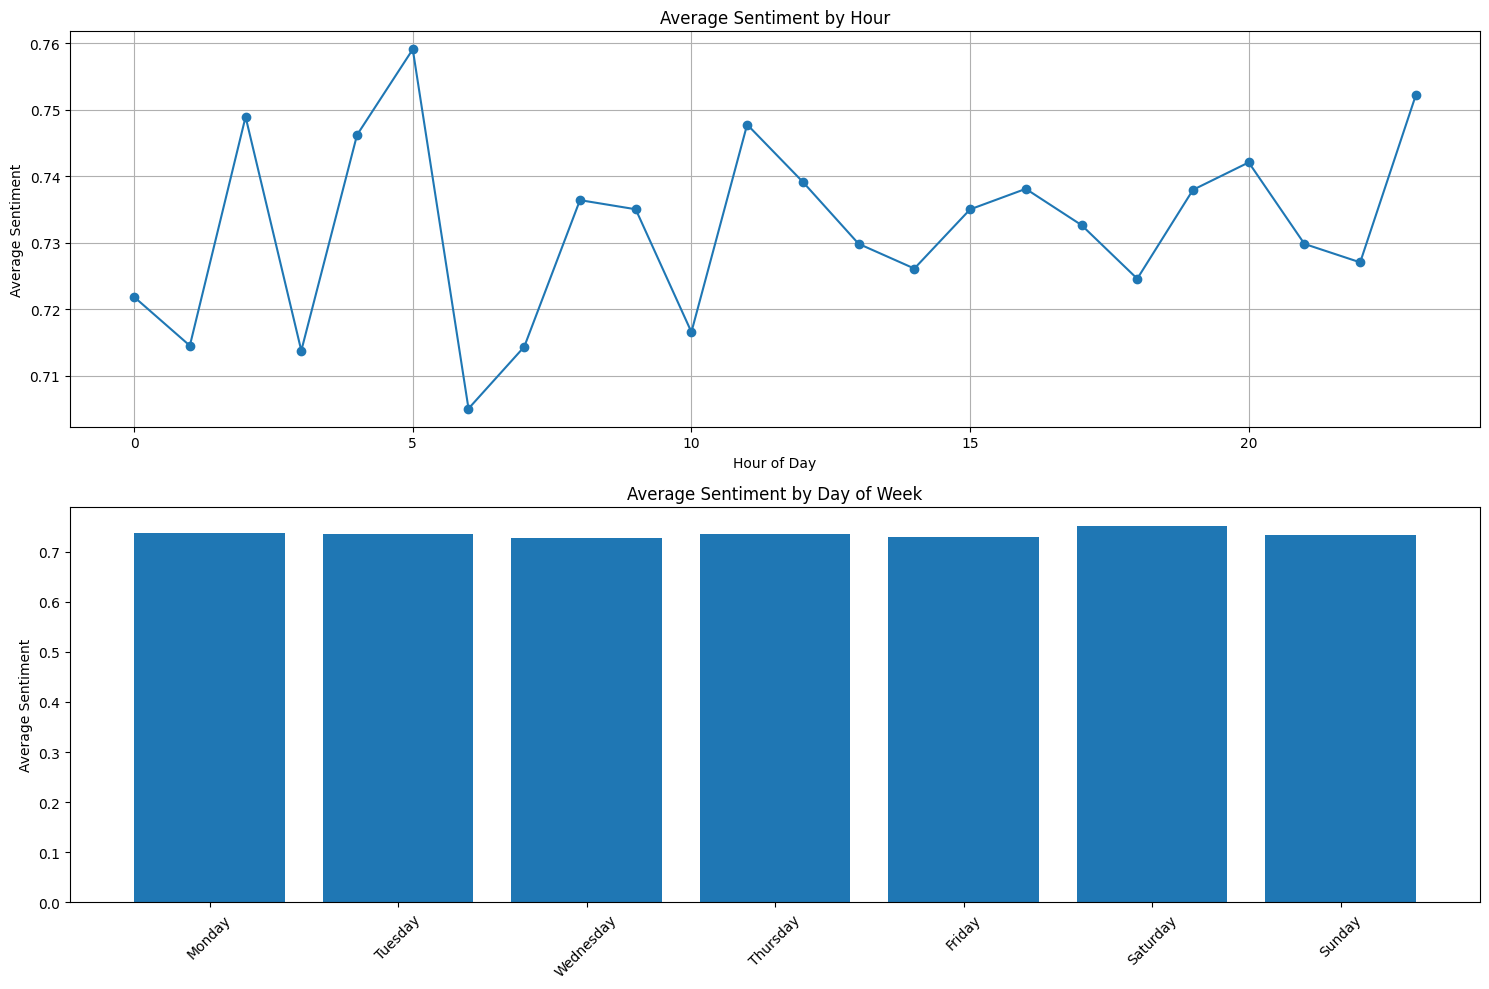


Analyzing Conversation Flow Patterns...


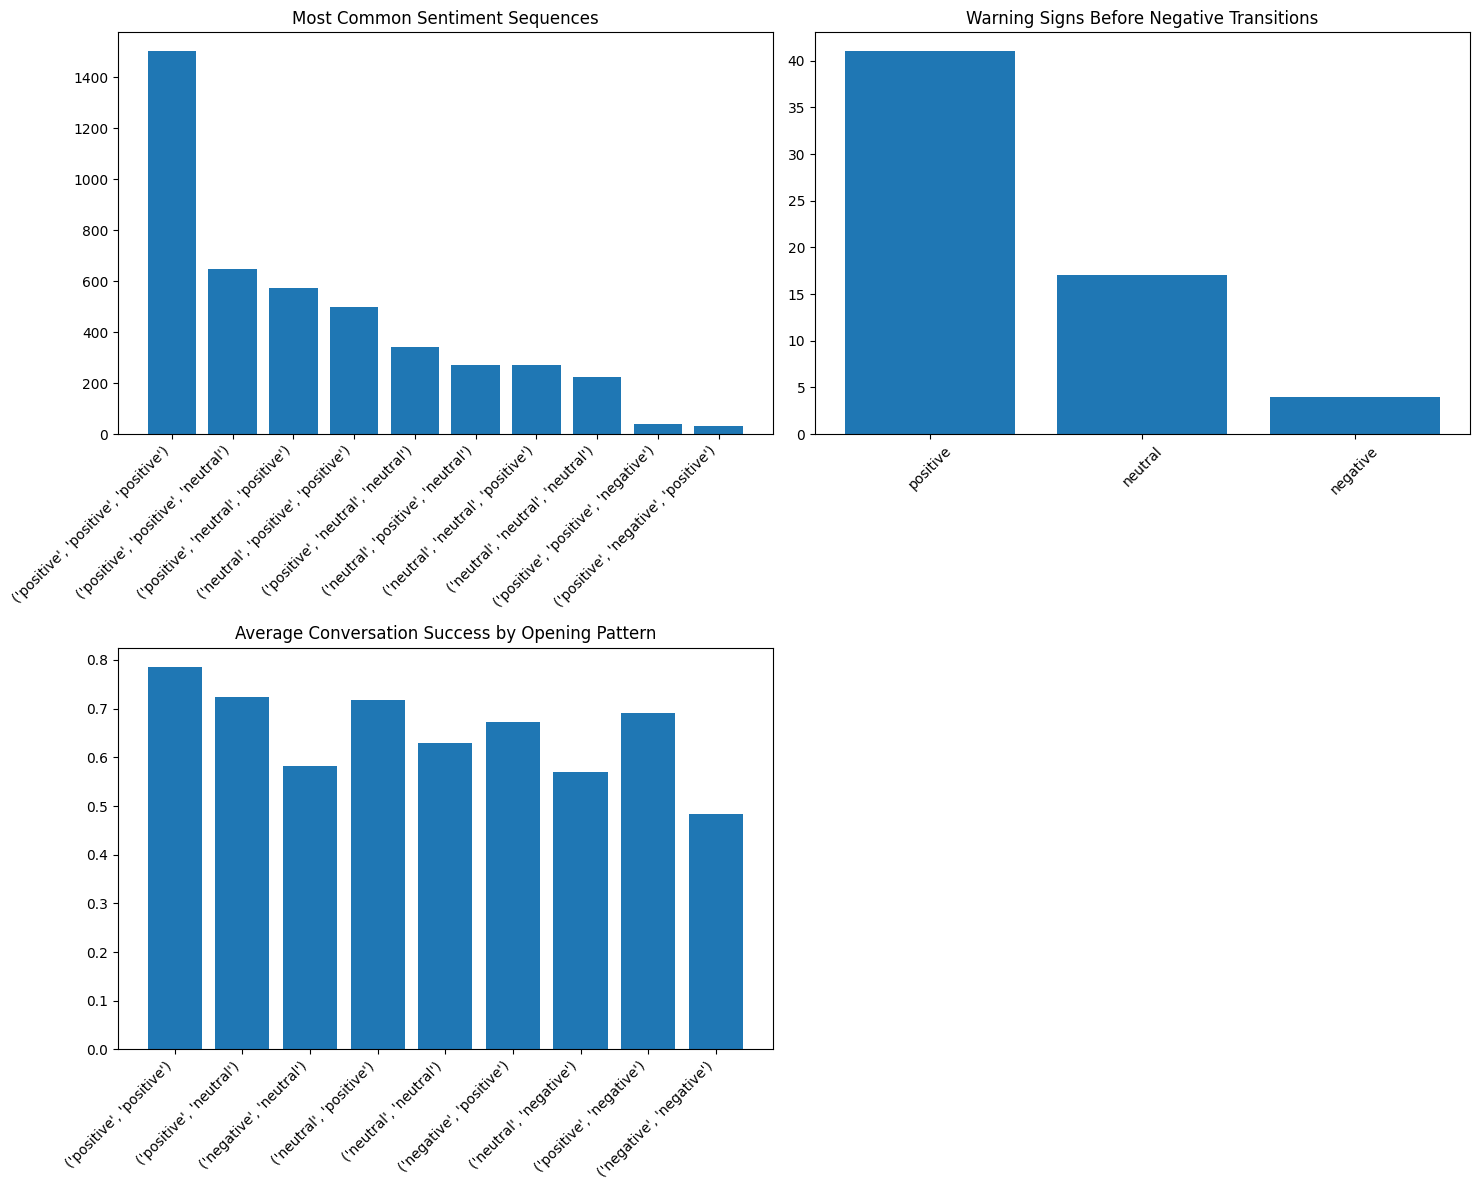


=== COMPREHENSIVE ANALYSIS SUMMARY ===

Complexity Insights:
Average conversation length: 5.1 messages
Typical frustration point: Message #2

Temporal Insights:
Most positive hour of day: 5:00

Conversation Flow Insights:
Most successful opening pattern: ('positive', 'positive')


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from collections import defaultdict

def analyze_conversation_complexity(conversations):
    """Analyze relationship between conversation length and frustration patterns."""
    print("\nAnalyzing Conversation Complexity...")
    
    complexity_stats = {
        'conv_lengths': [],
        'frustration_points': [],
        'length_vs_negative': defaultdict(list)
    }
    
    for conv in conversations:
        conv_length = len(conv['messages'])
        complexity_stats['conv_lengths'].append(conv_length)
        
        # Track when negative sentiments occur
        negative_indices = [i for i, sent in enumerate(conv['sentiments']) 
                          if sent['score'] < 0.5]
        
        if negative_indices:
            complexity_stats['frustration_points'].append(negative_indices[0])
            complexity_stats['length_vs_negative'][conv_length].append(
                len(negative_indices)/conv_length
            )
    
    # Visualization
    plt.figure(figsize=(15, 10))
    
    # Conversation Length Distribution
    plt.subplot(2, 2, 1)
    plt.hist(complexity_stats['conv_lengths'], bins=30)
    plt.title('Distribution of Conversation Lengths')
    plt.xlabel('Number of Messages')
    plt.ylabel('Frequency')
    
    # When Frustration Occurs
    plt.subplot(2, 2, 2)
    plt.hist(complexity_stats['frustration_points'], bins=20)
    plt.title('When Frustration First Occurs')
    plt.xlabel('Message Number')
    plt.ylabel('Frequency')
    
    # Length vs Negative Rate
    plt.subplot(2, 2, 3)
    lengths = list(complexity_stats['length_vs_negative'].keys())
    neg_rates = [np.mean(rates) for rates in complexity_stats['length_vs_negative'].values()]
    plt.scatter(lengths, neg_rates)
    plt.title('Conversation Length vs Negative Rate')
    plt.xlabel('Conversation Length')
    plt.ylabel('Proportion of Negative Messages')
    
    plt.tight_layout()
    plt.show()
    
    return complexity_stats

def analyze_temporal_factors(conversations):
    """Analyze temporal patterns in conversation quality."""
    print("\nAnalyzing Temporal Patterns...")
    
    temporal_stats = {
        'hour_stats': defaultdict(list),
        'weekday_stats': defaultdict(list),
        'response_times': []
    }
    
    for conv in conversations:
        # Convert timestamp to datetime if it's not already
        timestamp = pd.to_datetime(conv['timestamp'])
        hour = timestamp.hour
        weekday = timestamp.strftime('%A')
        
        # Calculate average sentiment for this conversation
        avg_sentiment = np.mean([s['score'] for s in conv['sentiments']])
        
        temporal_stats['hour_stats'][hour].append(avg_sentiment)
        temporal_stats['weekday_stats'][weekday].append(avg_sentiment)
    
    # Visualization
    plt.figure(figsize=(15, 10))
    
    # Hourly Pattern
    plt.subplot(2, 1, 1)
    hours = sorted(temporal_stats['hour_stats'].keys())
    hourly_avg = [np.mean(temporal_stats['hour_stats'][h]) for h in hours]
    plt.plot(hours, hourly_avg, marker='o')
    plt.title('Average Sentiment by Hour')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Sentiment')
    plt.grid(True)
    
    # Weekday Pattern
    plt.subplot(2, 1, 2)
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_avg = [np.mean(temporal_stats['weekday_stats'][w]) for w in weekdays]
    plt.bar(weekdays, weekday_avg)
    plt.title('Average Sentiment by Day of Week')
    plt.xticks(rotation=45)
    plt.ylabel('Average Sentiment')
    
    plt.tight_layout()
    plt.show()
    
    return temporal_stats

def analyze_conversation_flow(conversations):
    """Analyze sequential patterns in conversations."""
    print("\nAnalyzing Conversation Flow Patterns...")
    
    flow_stats = {
        'common_sequences': defaultdict(int),
        'warning_signs': defaultdict(int),
        'opening_patterns': defaultdict(list)
    }
    
    # Define sentiment categories
    def categorize_sentiment(score):
        if score < 0.3: return 'very_negative'
        elif score < 0.5: return 'negative'
        elif score < 0.7: return 'neutral'
        else: return 'positive'
    
    for conv in conversations:
        # Analyze sentiment sequences
        sentiment_sequence = [categorize_sentiment(s['score']) for s in conv['sentiments']]
        
        # Track 3-message sequences
        for i in range(len(sentiment_sequence)-2):
            sequence = tuple(sentiment_sequence[i:i+3])
            flow_stats['common_sequences'][sequence] += 1
            
            # Look for warning signs (positive to negative transitions)
            if sequence[0] == 'positive' and sequence[2] == 'negative':
                flow_stats['warning_signs'][sequence[1]] += 1
        
        # Analyze conversation openings (first 2 messages)
        if len(sentiment_sequence) >= 2:
            opening = tuple(sentiment_sequence[:2])
            flow_stats['opening_patterns'][opening].append(
                np.mean([s['score'] for s in conv['sentiments']])
            )
    
    # Visualization
    plt.figure(figsize=(15, 12))
    
    # Most Common Sequences
    plt.subplot(2, 2, 1)
    common_seqs = sorted(flow_stats['common_sequences'].items(), 
                        key=lambda x: x[1], reverse=True)[:10]
    plt.bar([str(seq) for seq, count in common_seqs], 
            [count for seq, count in common_seqs])
    plt.title('Most Common Sentiment Sequences')
    plt.xticks(rotation=45, ha='right')
    
    # Warning Signs
    plt.subplot(2, 2, 2)
    warning_labels = list(flow_stats['warning_signs'].keys())
    warning_counts = list(flow_stats['warning_signs'].values())
    plt.bar(warning_labels, warning_counts)
    plt.title('Warning Signs Before Negative Transitions')
    plt.xticks(rotation=45)
    
    # Opening Patterns Success
    plt.subplot(2, 2, 3)
    opening_success = {k: np.mean(v) for k, v in flow_stats['opening_patterns'].items()}
    plt.bar([str(k) for k in opening_success.keys()], 
            list(opening_success.values()))
    plt.title('Average Conversation Success by Opening Pattern')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    return flow_stats

# Run all analyses
def run_comprehensive_analysis(conversations):
    """Run all three analyses and print summary insights."""
    
    complexity_stats = analyze_conversation_complexity(conversations)
    temporal_stats = analyze_temporal_factors(conversations)
    flow_stats = analyze_conversation_flow(conversations)
    
    print("\n=== COMPREHENSIVE ANALYSIS SUMMARY ===")
    
    print("\nComplexity Insights:")
    print(f"Average conversation length: {np.mean(complexity_stats['conv_lengths']):.1f} messages")
    print(f"Typical frustration point: Message #{np.median(complexity_stats['frustration_points']):.0f}")
    
    print("\nTemporal Insights:")
    best_hour = max(temporal_stats['hour_stats'].items(), 
                   key=lambda x: np.mean(x[1]))[0]
    print(f"Most positive hour of day: {best_hour}:00")
    
    print("\nConversation Flow Insights:")
    best_opening = max(flow_stats['opening_patterns'].items(), 
                      key=lambda x: np.mean(x[1]))[0]
    print(f"Most successful opening pattern: {best_opening}")
    
    return {
        'complexity': complexity_stats,
        'temporal': temporal_stats,
        'flow': flow_stats
    }

# Call the comprehensive analysis
results = run_comprehensive_analysis(conversations)

Patterns:

Most conversations are short (avg 5.1 messages)
When things go wrong, it happens early (typically message #2)
Sentiment relatively stable across days of week
Most frustration occurs in first 5 messages (highest frequency)
Longer conversations show lower negative rates
Shorter conversations tend to be more successful

